In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode

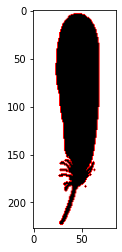

In [2]:
def bound(BW,conn):
    innerboundary=[]
    for i in range(BW.shape[0]):
        for j in range(BW.shape[1]):
            if conn==4:
                neighbours=[(i-1,j),(i+1,j),(i,j-1),(i,j+1)]
            if conn==8:
                neighbours=[(i-1,j),(i+1,j),(i,j-1),(i,j+1),(i-1,j-1),(i+1,j+1),(i-1,j+1),(i+1,j-1)]
            
            for k in neighbours: # for boundary pixels
                if k[0]<0 or k[0]>BW.shape[0]-1 or k[1]<0 or k[1]>BW.shape[1]-1:
                    neighbours.remove(k)
                    
            if all(BW[i,j] == [255,255,255]) :
                for k in neighbours:
                    if all(BW[k[0],k[1]] == [0,0,0]):
                        innerboundary.append((i,j))
                        BW[i,j] = np.array([255,0,0])
    return (BW)
                        
    
BW=cv2.imread("one_bird_BW.tif")
output = bound(BW,4)

fig=plt.figure(figsize=(8, 4))
fig.add_subplot(1, 1, 1)   # subplot one
plt.imshow(output, cmap=plt.cm.gray)